# Predictit

## Import libraries

In [1]:
import mydatapreprocessing as mdp
import numpy as np
import pandas as pd

import predictit
from predictit import config

ModuleNotFoundError: No module named 'mypythontools'

## Compare models

First we want to find what models and what configuration we should use. We can use `compare_models` function.

In [2]:
# Get some data we can use
data = mdp.generate_data.get_ecg(1000)

# More data parts should be used as just one prediction for every part is made.
# Because even bad model can be lucky, we evaluate error on more time points.
config.data_input.data_all = [data[:400], data[:600]]  # More parts

# If we don't know optimal value of some config variable, we can use optimization.
config.variable_optimization.optimization = True
config.variable_optimization.optimization_variable = "default_n_steps_in"
config.variable_optimization.optimization_values = [7, 9, 12]

# You can also edit more config values at once with
# No subcategories are used, so shorter code, but cannot use intellisense
config.update(
    {
        # Print just few best models for shorter output in jupyter cell
        "print_number_of_models": 4,
        "print_number_of_comparison_models": 6,  # Print just few best models for shorter output in jupyter cell
    }
)

comparison_results = predictit.compare_models()



+-----------------+---------------+------------------+----------------+
|      Name       |  Model error  |  Model time [s]  |  Optimization  |
|                 |               |                  |     value      |
+=================+===============+==================+================+
|   KNeighbors    |     0.037     |      0.018       |       7        |
|   regression    |               |                  |                |
+-----------------+---------------+------------------+----------------+
|     Hubber      |     0.056     |      0.225       |       9        |
|   regression    |               |                  |                |
+-----------------+---------------+------------------+----------------+
|    Conjugate    |     0.426     |      0.008       |       9        |
|    gradient     |               |                  |                |
+-----------------+---------------+------------------+----------------+
|     Sklearn     |     0.426     |      0.000       |       9 


+---------------+---------------+------------------+----------------+
|     Name      |  Model error  |  Model time [s]  |  Optimization  |
|               |               |                  |     value      |
+===============+===============+==================+================+
|     ARIMA     |     0.014     |      0.909       |       7        |
+---------------+---------------+------------------+----------------+
|      LNU      |     0.041     |      0.431       |       7        |
+---------------+---------------+------------------+----------------+
| Average short |     0.096     |      0.000       |       7        |
+---------------+---------------+------------------+----------------+
|    Hubber     |     0.253     |      0.108       |       7        |
|  regression   |               |                  |                |
+---------------+---------------+------------------+----------------+



Complete results for comparison
Table of complete results. Percentual standardized err

### Analyze comparison results

Results contain results of `predict` function for all defined data. Black wide line in plot is real data, others are models out of sample predictions. Also tables with error and time are shown.

At the end overal results are shown. You can see ordered models by average errors for all the data and best values of optimized config variable for each model.  

## Predict

Now when we know what models are good for our data, we can use predict function to get the predictions.

In [ ]:

config.DataInput.data = mdp.generate_data.sin(500)

config.models.used_models = ["Hubber regression", "KNeighbors regression", "Conjugate gradient", "Sklearn regression one column one step"]

predictions = predictit.predict()  # Returned variable is a class that you can use further

## Predict multiple columns

You can use wildcard to predict all the columns.

In [ ]:
# Setup predictions
config.output.print_subconfig.print_table = None
config.output.print_subconfig.print_result_details = False
config.output.print_subconfig.print_time_table = False
config.output.plot_subconfig.show_plot = False
all_predictions = predictit.predict_multiple_columns(pd.DataFrame([range(200), range(400, 200, -1)]).T, ["*"])

print(all_predictions.best_predictions_dataframes["Freq: Default frequency"])

## Hyperparameter optimization

There are defaults values for default and boundary values, so usually just

    config.hyperparameter_optimization.optimizeit = True

But configuration is still possible.

In [2]:
config.data_input.data = mdp.generate_data.get_ecg(500)
config.models.used_models = ["Bayes ridge regression", "Levenberg-Marquardt"]
config.hyperparameter_optimization.optimizeit = True
# The bigger fragments and iterations are, the better results and more time it takes
config.hyperparameter_optimization.fragments = 4
config.hyperparameter_optimization.iterations = 3
config.hyperparameter_optimization.models_parameters_limits = {
    "Levenberg-Marquardt": {"learning_rate": [0.0001, 0.1]},
    "Bayes ridge regression": {
        "alpha_1": [1e-1, 1e-8],
        "alpha_2": [1e-1, 1e-8],
        "lambda_1": [1e-1, 1e-8],
        "lambda_2": [1e-1, 1e-8],
    },
}

predictions = predictit.predict()



Optimization of model Levenberg-Marquardt:

  Default parameters result: 0.08730247462589995

    Iteration 1 / 3 results: 

    Iteration 2 / 3 results: 

    Iteration 3 / 3 results: 

  Optimization finished. Best result 0.03917103828576344 with parameters {'learning_rate': 0.008425000000000005}


Optimization of model Bayes ridge regression:

  Default parameters result: 0.07431411878902901

    Iteration 1 / 3 results: 

	Optimization is in 68 %
    Iteration 2 / 3 results: 

	Optimization is in 35 %
	Optimization is in 101 %
  Optimization stopped, because converged. Best result 0.07431373642856968 with parameters {'alpha_1': 1e-08, 'alpha_2': 0.00012499750000000002, 'lambda_1': 0.00012499750000000002}



Best model is Levenberg-Marquardt with results 

500    0.859115
501    0.872581
502    0.872859
503    0.867151
504    0.859692
505    0.851142
506    0.840727
Name: Levenberg-Marquardt, dtype: float64

With model error mse = 0.03917103828576344

+-------------+--------------------------------------+------------------+---------------+------------------+
|    Name     |            Best optimized            |  Hyperparameter  |  Model error  |  Model time [s]  |
|             |              parameters              |   optimization   |               |                  |
|             |                                      |       time       |               |                  |
+=============+======================================+==================+===============+==================+
| Levenberg-  |                  {                   |      0.203       |     0.039     |      0.009       |
|  Marquardt  |         "learning_rate": 0.008       |                  |               |        

## Use another functions

Sometimes you may want just part of all predict process, you can use functions as you need.

Libraries `mydatapreprocessing`, `mypythontools` and `mylogging` are closely related.

Some examples for loading, consolidating, analyzing and plotting...

Length: 100
Minimum: 437.0
Maximun: 218880.0
Mean: 5137.2099609375
Std: 25602.1328125
First few values: [  441. 31433.   441.  1872.  3285.]
Middle values: [ 562.  437.  904.  661. 1484.]
Last few values: [  441. 31433.   441.  1872.  3285.]
Number of nan (not a number) values: 0


p-value = 0.10058518298633135 : Analyzed column is probably not stationary.



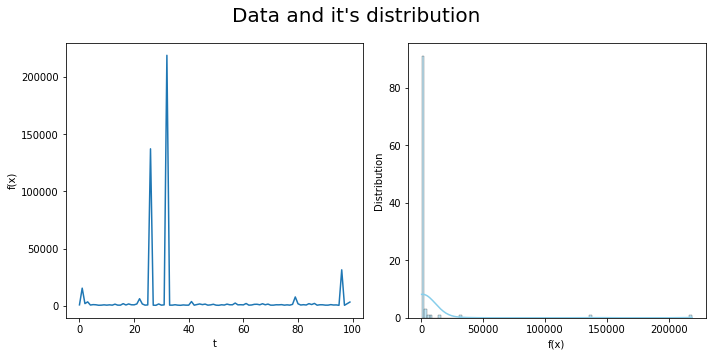

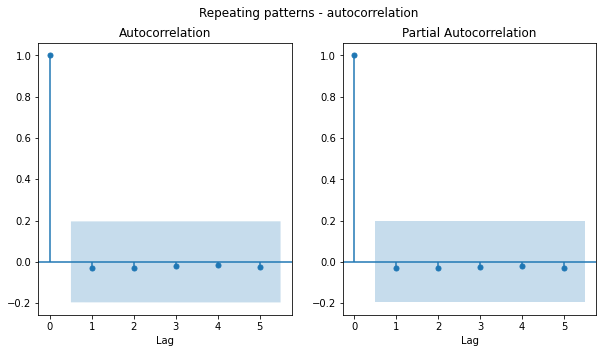

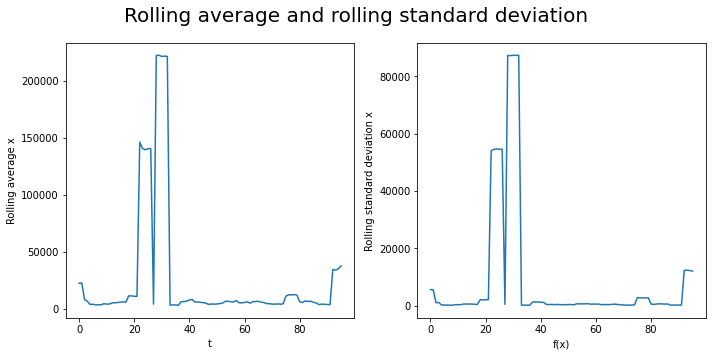

In [3]:
import mydatapreprocessing as mdp
from mypythontools.plots import plot
from predictit.analyze import analyze_column

data = "https://blockchain.info/unconfirmed-transactions?format=json"

# Load data from file or URL
data_loaded = mdp.load_data.load_data(data, request_datatype_suffix=".json", predicted_table='txs', data_orientation="index")

# Transform various data into defined format - pandas dataframe - convert to numeric if possible, keep
# only numeric data and resample ifg configured.
data_consolidated = mdp.preprocessing.data_consolidation(
    data_loaded, predicted_column="weight", remove_nans_threshold=0.9, remove_nans_or_replace='interpolate')

# Predicted column is on index 0 after consolidation)
analyze_column(data_consolidated.iloc[:, 0])

# Preprocess data. It return preprocessed data, but also last undifferenced value and scaler for inverse
# transformation, so unpack it with _
data_preprocessed, _, _ = mdp.preprocessing.preprocess_data(data_consolidated, remove_outliers=True, smoothit=False,
                                        correlation_threshold=False, data_transform=False, standardizeit='standardize')

# Plot inserted data
plot(data_preprocessed)


In [7]:
# You can use models itself as well

import mydatapreprocessing as mdp

data = mdp.generate_data.sin(1000)
test = data[-7:]
data = data[: -7]
data = mdp.preprocessing.data_consolidation(data)
(X, y), x_input, _ = mdp.create_model_inputs.create_inputs(data.values, 'batch', input_type_params={'n_steps_in': 6})  # First tuple, because some models use raw data - one argument, e.g. [1, 2, 3...]

trained_model = predictit.models.sklearn_regression.train((X, y), model='BayesianRidge')
predictions_one_model = predictit.models.sklearn_regression.predict(x_input, trained_model, predicts=7)

predictions_one_model_error = predictit.evaluate_predictions.compare_predicted_to_test(predictions_one_model, test, error_criterion='mape')  # , plot=1

print(f"Predictions: {predictions_one_model} \nError: {predictions_one_model_error}")

Predictions: [0.96245525 0.97236996 0.98078534 0.98768844 0.99306856 0.99691746
 0.9992292 ] 
Error: 8.797796657855628e-06
